In [7]:
"""
author: Mahya Qorbani
Date: 3/22/2021

"""

In [1]:
#inputs
const =[]
d = open(r"E:\file\AI\amali\question 4\input6.txt")
i=0
for line in d:
    stripped = line.strip().split()
    if i == 0:
        stripped = (list(map(int, stripped)))[0]
        string_length = stripped
    elif i == 1:
        stripped = (list(map(int, stripped)))[0]
        population_size = stripped
    elif i == 2:
        stripped = (list(map(int, stripped)))[0]
        steps = stripped
    elif i == 3:
        sets = stripped
    else:
        const.append(stripped)
    i+=1

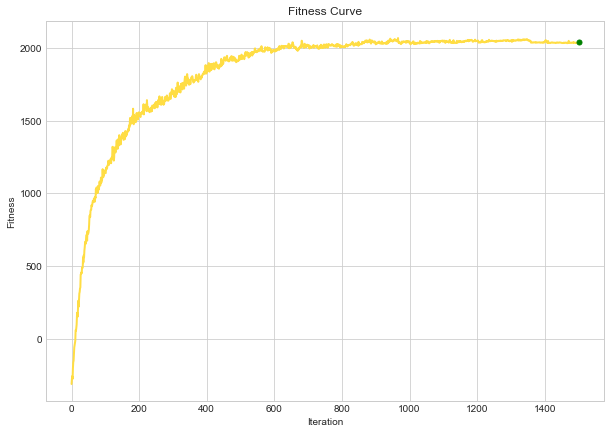

In [126]:
#برای پیاده سازی الگوریتم اولیه، کد زیر را ران کنید.
answer, y = GA_algorithm(steps, string_length, population_size, const, 0.01 )

#برای پیاده سازی الگوریتم بهبود یافته، کد زیر را ران کنید.
# answer, y = advanced_GA_algorithm(steps, string_length, population_size, const, 0.05 )


import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(10,7))
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(y)), y, color='#FFDD44', linewidth=2)
plt.plot((len(y)), y[-1], color='green', marker='o', markersize=5, visible=True)

In [ ]:
#TO STORE OUTPUT IN A TEXT FILE
l = get_fitness(answer, const)
i = l.index(max(l))

text_file = open(r"E:\file\AI\amali\question 4\A6.txt", "w")

l = get_fitness(answer, const)
i = l.index(max(l))

text_file.write(str(answer[i]) + '\n')
#text_file.write(str(l[i]))

text_file.close()

In [176]:
def GA_algorithm(steps, string_length, population_size, const, mutation_prob ):
    plot_y = []
    #list of first guess
    new_answer = generate_parent(string_length, population_size)
    fitnesses = get_fitness(new_answer, const)
    plot_y.append(max(fitnesses))
    for k in range(0, steps):
#         if k %100 ==0:
#             print(max(fitnesses))
        answer = new_answer.copy()
        new_answer = []
        for q in range(0, population_size):
            #choose two parents
            parents_keys = selection(answer, fitnesses)
            #crossover
            random_cross_point = random.randint(0, string_length)
            new_parent = cross_over(parents_keys[0], parents_keys[1], random_cross_point)
            #mutation for the produced child
            new_parent = mutate(new_parent, sets, mutation_prob)
            new_answer.append(new_parent)
        #list of fitness
        fitnesses = get_fitness(new_answer, const)
        plot_y.append(max(fitnesses))
    
    return new_answer, plot_y

In [50]:
#guess
import random
def generate_parent(length, number):
    parents=[]
    
    for i in range(0,number):
        DNA = random.choices(population = sets, k=length)
        parents.append(''.join(DNA))

    return parents

In [3]:
#fitness
import re
def get_fitness(parents, const):
    fitnesses = [0]*len(parents)
    
    for k in range(len(parents)):
        for constraint in const:
            fitnesses[k] += len(re.findall(constraint[0], parents[k])) * int(constraint[1])
            
    return fitnesses

In [52]:
#selection -input is two lists of parents & their fitness
from itertools import accumulate
def selection(parents_keys, parents_values):
    new_parents_keys = list()
    cum_values = parents_values.copy()
    n = min(cum_values)
    if n<0:
        cum_values = [i-n+1 for i in cum_values]
    new_parents_keys = random.choices(population = parents_keys, weights = cum_values, k=2)
    
    return new_parents_keys

In [168]:
#cross over
def cross_over(parent1, parent2, crossover_point):
    
    newparent1 = parent2[0:crossover_point]+(parent1[crossover_point:])
    
    return newparent1

In [54]:
#mutation
def mutate(parent, Sets, mutation_prob):
    rand = random.random()
    j = list(parent)
    childDNA = list()
    childDNA = j.copy()    
    if rand < mutation_prob:
        index = random.randrange(0, len(parent))
        alternate1, alternate2, alternate3 = random.sample(Sets, 3)
        if childDNA[index] != str(alternate1):
            childDNA[index] = str(alternate1)
        elif childDNA[index] != str(alternate2):
            childDNA[index] = str(alternate2)
        else:
            childDNA[index] = str(alternate3)
            
    return ''.join(childDNA)

In [177]:
def advanced_GA_algorithm(steps, string_length, population_size, const, mutation_prob ):
    plot_y = []
    #list of first guess
    new_answer = generate_parent(string_length, population_size)
    fitnesses = get_fitness(new_answer, const)
    plot_y.append(max(fitnesses))
    for k in range(0, steps):
        answer = new_answer.copy()
        new_answer = []
        for q in range(0, population_size):
            #choose two parents
            parents_keys = selection(answer, fitnesses)
            #crossover
            random_cross_point = random.randint(0, string_length)
            new_parent = advanced_cross_over(parents_keys[0], parents_keys[1], random_cross_point)
            #mutation for the produced child
            new_parent = advanced_mutate(new_parent, sets, mutation_prob)
            new_answer.append(new_parent)
        #list of fitness
        fitnesses = get_fitness(new_answer, const)
        plot_y.append(max(fitnesses))
    
    return new_answer, plot_y

In [173]:
#advanced crossover
def advanced_cross_over(parent1, parent2, crossover_point):
    
    crossover_point2 = random.randint(crossover_point, len(parent1))
    newparent1 = parent2[0:crossover_point]+(parent1[crossover_point:crossover_point2]) + (parent2[crossover_point2:])
    
    return newparent1

In [162]:
#advanced mutation
def advanced_mutate(parent, Sets, mutation_prob):
    rand = random.random()
    j = list(parent)
    childDNA = list()
    childDNA = j.copy()    
    if rand < mutation_prob:
        for i in range(0,6):
            index = random.randrange(0, len(parent))
            alternate1, alternate2, alternate3 = random.sample(Sets, 3)
            if childDNA[index] != str(alternate1):
                childDNA[index] = str(alternate1)
            elif childDNA[index] != str(alternate2):
                childDNA[index] = str(alternate2)
            else:
                childDNA[index] = str(alternate3)
            
    return ''.join(childDNA)
